In [1]:
# Import the necessary libraries
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
# Load the dataset
df = pd.read_csv('spam.csv',encoding="Latin-1")

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
#droping unnecessary columns

df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis=1,inplace=True)

In [6]:
#renaming columns

df.columns=['label','email']

In [7]:
df.head()

,label,email
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
#check null values
df.isnull().sum()

label    0
email    0
dtype: int64

<Axes: xlabel='label', ylabel='count'>

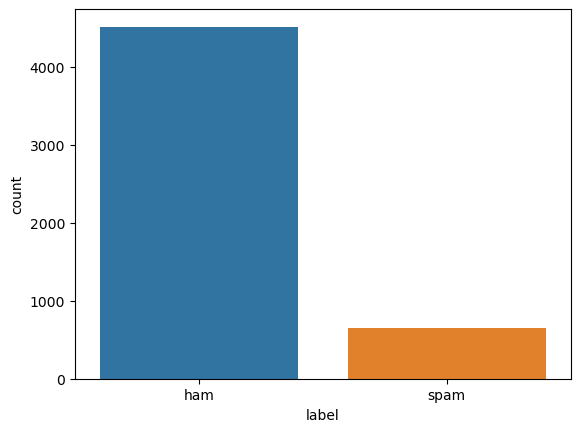

In [12]:
# checking the count 
sns.countplot(data=df,x='label')

In [13]:
# Check for duplicate values
duplicates = df.duplicated()

# Print the duplicate rows
print(df[duplicates])

#remove duplicates

df.drop_duplicates(inplace=True)

Empty DataFrame
Columns: [label, email]
Index: []


In [14]:
df.shape

(5169, 2)

In [15]:
#encoding result column
df['label']=df['label'].replace({'ham':0,'spam':1})
df.head()

,label,email
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
#train test split
from sklearn.model_selection import train_test_split
x=df['email']
y=df['label']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=8)
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(3618,)
(1551,)
(3618,)
(1551,)


In [17]:
# Vectorize the email text using TF-IDF
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
x_train=cv.fit_transform(xtrain)

In [18]:
x_train.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [19]:
#training model using multinominal naive bayes
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()
model.fit(x_train,ytrain)

MultinomialNB()

In [20]:
x_test=cv.transform(xtest)
model.score(x_test,ytest)

0.9832366215344939

In [21]:
ypred=model.predict(x_test)
ypred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("Multinomial NB")
print("Accuracy score: {}". format(accuracy_score(ytest, ypred)) )
print("Precision score: {}". format(precision_score(ytest, ypred)) )
print("Recall score: {}". format(recall_score(ytest, ypred)))
print("F1 score: {}". format(f1_score(ytest, ypred)))

Multinomial NB
Accuracy score: 0.9832366215344939
Precision score: 0.9782608695652174
Recall score: 0.8910891089108911
F1 score: 0.9326424870466321


In [23]:
email=["Wondering if a career in business analysis is right for you? Or are you eager to add business analysis to your skill set? Join us for a free webinar on Jun 29, 2023 and get an exclusive insight into the Post Graduate Program in Business Analysis from Purdue University. Just for attending, you’ll get an exclusive discount offer on the bootcamp."]

In [24]:
cv_email=cv.transform(email)
p=model.predict(cv_email)

In [25]:
labels = ["ham" if value == 1 else "spam" for value in p]
print(labels)

['spam']
